# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [161]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt 

from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [162]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [163]:
# set up the url address
url = "http://api.openweathermap.org/data/2.5/weather?"

# set up lists to hold reponse info
City        = []
Cloudiness  = []
Country     = []
Date        = []
Humidity    = []
Lat         = []
Lng         = []
Max_Temp    = []
Wind_Speed  = []

# for each of the city from the list genereated
for city in cities:
    print("Extracting data for " + city)
    
    # handle key errors.  Weather API may not have information on some of 
    # random cities genereated above. 
    try:
        # get the weather data using the city as key 
        # temperature unit in Fahrenheit
        query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
        weather_response = requests.get(query_url)
        data = weather_response.json()

        # extract from data received and populate the lists
        City.append(data['name'])
        Cloudiness.append(data['clouds']['all'])
        Country.append(data['sys']['country'])
        Date.append(data['dt'])
        Humidity.append(data['main']['humidity'])
        Lat.append(data['coord']['lat'])
        Lng.append(data['coord']['lon'])
        Max_Temp.append(data['main']['temp_max'])
        Wind_Speed.append(data['wind']['speed'])
    
    except KeyError:
        print("No information on " + city)


Extracting data for atuona
Extracting data for nizhneyansk
No information on nizhneyansk
Extracting data for mataura
Extracting data for cockburn town
Extracting data for norman wells
Extracting data for coihaique
Extracting data for jalu
Extracting data for koryukivka
Extracting data for barentsburg
No information on barentsburg
Extracting data for punta arenas
Extracting data for hobart
Extracting data for rikitea
Extracting data for lorengau
Extracting data for albany
Extracting data for saint-philippe
Extracting data for jamestown
Extracting data for shellbrook
Extracting data for okha
Extracting data for bengkulu
No information on bengkulu
Extracting data for ahipara
Extracting data for mogadishu
Extracting data for shebekino
Extracting data for aklavik
Extracting data for goderich
Extracting data for malanje
Extracting data for podosinovets
Extracting data for povenets
Extracting data for bundaberg
Extracting data for cape town
Extracting data for kuche
No information on kuche
Ex

Extracting data for sovetskiy
Extracting data for coolum beach
Extracting data for sikonge
Extracting data for barbar
No information on barbar
Extracting data for springfield
Extracting data for abasolo
Extracting data for albesti
Extracting data for oppdal
Extracting data for colares
Extracting data for pangai
Extracting data for bani walid
Extracting data for beloha
Extracting data for hailar
Extracting data for severodvinsk
Extracting data for linkou
Extracting data for ayan
Extracting data for brahmapuri
No information on brahmapuri
Extracting data for petropavlovsk-kamchatskiy
Extracting data for sao gotardo
Extracting data for gorontalo
Extracting data for vila franca do campo
Extracting data for taltal
Extracting data for muros
Extracting data for airai
Extracting data for hat yai
Extracting data for cidreira
Extracting data for ninghai
Extracting data for panalingaan
Extracting data for calabozo
Extracting data for nouadhibou
Extracting data for victoria
Extracting data for rio

Extracting data for kot samaba
Extracting data for barth
Extracting data for balmazujvaros
Extracting data for dalvik
Extracting data for san patricio
Extracting data for marystown
Extracting data for diapaga
Extracting data for abu samrah
Extracting data for samusu
No information on samusu
Extracting data for xining
Extracting data for yertsevo
Extracting data for dubai
Extracting data for great yarmouth
Extracting data for kurumkan
Extracting data for moroni
Extracting data for gouyave
Extracting data for turukhansk
Extracting data for naqadeh
Extracting data for keti bandar
Extracting data for nerchinskiy zavod
Extracting data for laguna
Extracting data for berlevag
Extracting data for nador
Extracting data for barinas
Extracting data for mpigi
Extracting data for elat
Extracting data for kattivakkam
Extracting data for yeppoon
Extracting data for balabac
Extracting data for tignere
Extracting data for santa maria
Extracting data for alghero
Extracting data for fort nelson
Extractin

In [168]:
# create a data frame from cities, lat, and temp
weather_dict = {
    'city': City,
    'cloudiness': Cloudiness,
    'country': Country,
    'date': Date,
    'humidity': Humidity,
    'lat': Lat,
    'lng': Lng,
    'max_temp': Max_Temp,
    'wind_speed': Wind_Speed
}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()

print("We have weather information on " + str(weather_df.shape[0]) + " cities")
weather_df.head()

We have weather information on 546 cities


,city,cloudiness,country,date,humidity,lat,lng,max_temp,wind_speed
0,Atuona,0,PF,1536875824,98,-9.80,-139.03,80.15,18.81
1,Mataura,0,NZ,1536875824,72,-46.19,168.86,51.98,10.31
2,Cockburn Town,80,TC,1536875761,96,21.46,-71.14,84.20,17.47
3,Norman Wells,20,CA,1536872400,42,65.28,-126.83,44.60,17.22
4,Coihaique,75,CL,1536872400,76,-45.58,-72.07,50.00,9.17


In [172]:
# Save the data in csv file
# Note to avoid any issues later, use encoding="utf-8"
weather_df.to_csv("weather_data.csv", encoding="utf-8", index=False)

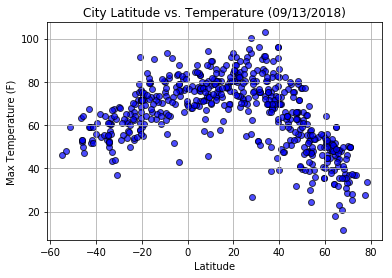

In [183]:
#  --------------  Latitude vs. Temperature Plot  --------------------

# x_axis ==> Latitude
# y_axis ==> Max Temperature (F)

plt.scatter(weather_df['lat'], weather_df['max_temp'], edgecolors="black",
            marker="o", alpha=0.7, facecolors="blue")

# cosmatic stuff
todays_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.title("City Latitude vs. Temperature (" + todays_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Temperature.png")
plt.show()

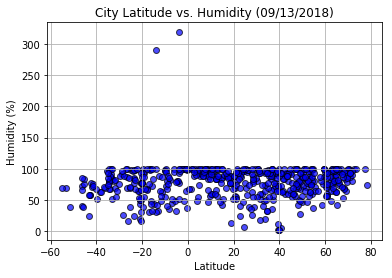

In [184]:
#  --------------  Latitude vs. Humidity Plot  --------------------

# x_axis ==> Latitude
# y_axis ==> Humidity (%)

plt.scatter(weather_df['lat'], weather_df['humidity'], edgecolors="black",
            marker="o", alpha=0.7, facecolors="blue")

# cosmatic stuff
todays_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.title("City Latitude vs. Humidity (" + todays_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Humidity.png")
plt.show()

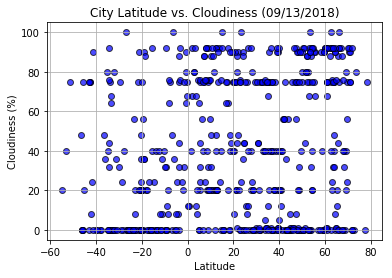

In [185]:
#  --------------  Latitude vs. Cloudiness Plot  --------------------

# x_axis ==> Latitude
# y_axis ==> Cloudiness (%)

plt.scatter(weather_df['lat'], weather_df['cloudiness'], edgecolors="black",
            marker="o", alpha=0.7, facecolors="blue")

# cosmatic stuff
todays_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.title("City Latitude vs. Cloudiness (" + todays_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Cloudiness.png")
plt.show()

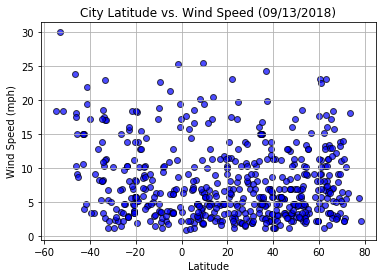

In [186]:
#  --------------  Latitude vs. Wind Speed Plot  --------------------

# x_axis ==> Latitude
# y_axis ==> Wind Speed (%)

plt.scatter(weather_df['lat'], weather_df['wind_speed'], edgecolors="black",
            marker="o", alpha=0.7, facecolors="blue")

# cosmatic stuff
todays_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.title("City Latitude vs. Wind Speed (" + todays_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Wind_Speed.png")
plt.show()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

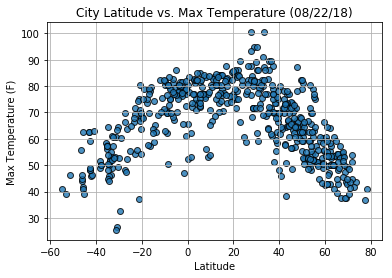

#### Latitude vs. Humidity Plot

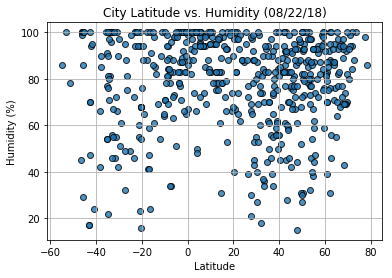

#### Latitude vs. Cloudiness Plot

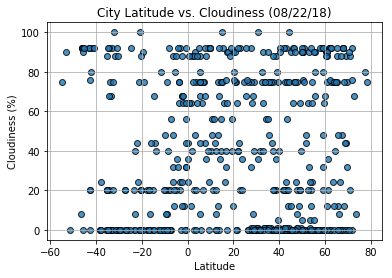

#### Latitude vs. Wind Speed Plot

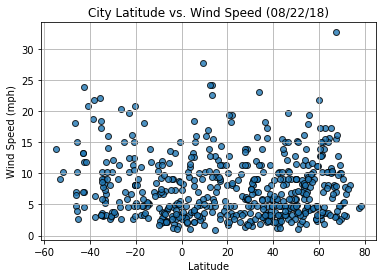

In [174]:
get_ipython().system('jupyter nbconvert --to script WeatherPy.ipynb')

[NbConvertApp] Converting notebook WeatherPy.ipynb to script
[NbConvertApp] Writing 5137 bytes to WeatherPy.py
